In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rules=[['NL','ZE','PL'],['ZE','NL','PL'],['NM','ZE','PM'],['NS','PS','PS'],['PS','NS','NS'],['PL','ZE','NL'],['ZE','NS','PS'],['ZE','NM','PM']]

Speed_fuzzy={'NL':['trap',0,31,61],'NM':['tri',31,61,95],'NS':['tri',61,95,127],'ZE':['tri',95,127,159],'PS':['tri',127,159,191],'PM':['tri',159,191,223],'PL':['trap',191,223,255]}

Acc_fuzzy={'NL':['trap',0,31,61],'NM':['tri',31,61,95],'NS':['tri',61,95,127],'ZE':['tri',95,127,159],'PS':['tri',127,159,191],'PM':['tri',159,191,223],'PL':['trap',191,223,255]}


Thro_fuzzy={'NL':['trap',0,31,61],'NM':['tri',31,61,95],'NS':['tri',61,95,127],'ZE':['tri',95,127,159],'PS':['tri',127,159,191],'PM':['tri',159,191,223],'PL':['trap',191,223,255]}


speed=int(input("Enter the speed difference:"))
acc=int(input("Enter the acceleration difference:"))

#actually the given value lies in this fuzzy set
actual_speed={}
actual_acc={}


Enter the speed difference:100
Enter the acceleration difference:70


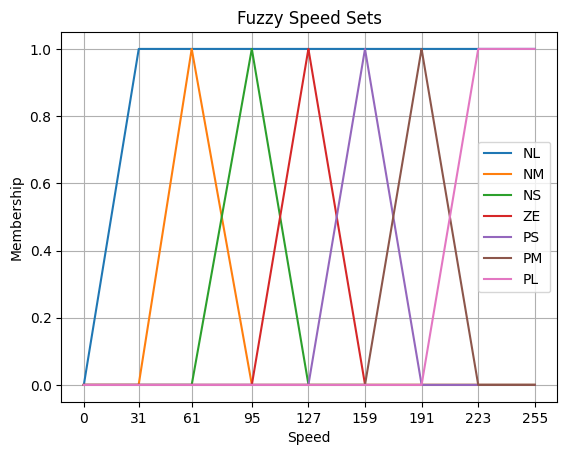

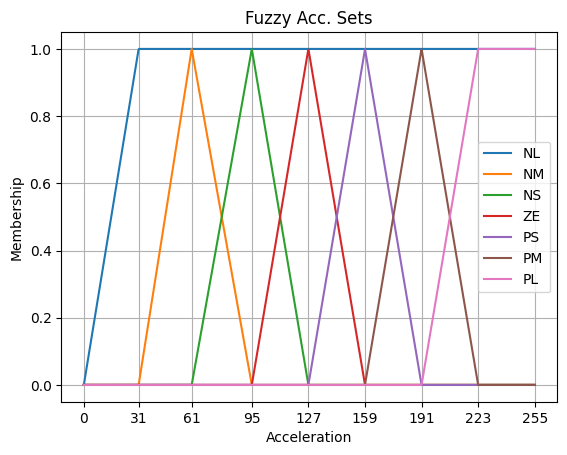

In [ ]:
'''PLOTTING'''
#plot speed difference
x = np.linspace(0, 255, 1000)
for key, value in Speed_fuzzy.items():

    shape, a, b, c = value
    if(shape=='tri'):
         y = np.maximum(0, np.minimum((x-a)/(b-a), (c-x)/(c-b)))
         plt.plot(x, y, label=key)
    elif(shape=='trap'):
        y=np.maximum(0, np.minimum((x - a) / (b - a), 1, (c - x) / (c - b)))
        plt.plot(x, y, label=key)
plt.xticks([0, 31, 61, 95, 127, 159, 191, 223, 255])
plt.xlabel('Speed')
plt.ylabel('Membership')
plt.title('Fuzzy Speed Sets')
plt.legend()
plt.grid(True)
plt.show()

#plot acc difference
x = np.linspace(0, 255, 1000)
for key, value in Acc_fuzzy.items():

    shape, a, b, c = value
    if(shape=='tri'):
         y = np.maximum(0, np.minimum((x-a)/(b-a), (c-x)/(c-b)))
         plt.plot(x, y, label=key)
    elif(shape=='trap'):
        y=np.maximum(0, np.minimum((x - a) / (b - a), 1, (c - x) / (c - b)))
        plt.plot(x, y, label=key)
plt.xticks([0, 31, 61, 95, 127, 159, 191, 223, 255])
plt.xlabel('Acceleration')
plt.ylabel('Membership')
plt.title('Fuzzy Acc. Sets')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'''FUZZIFICATION'''

#working on speed
for i in Speed_fuzzy.keys():
    if(speed >= Speed_fuzzy[i][1] and speed<=Speed_fuzzy[i][3]):

        print("Fuzzy sets having Speed",speed," is :",i)
        actual_speed[i]=''

#working on acc
for i in Acc_fuzzy.keys():
    if(acc >= Acc_fuzzy[i][1] and acc<=Acc_fuzzy[i][3]):
        print("Fuzzy sets having Acc.",acc," is :",i)
        actual_acc[i]=''




#finding membership value for speed
for i in actual_speed.keys():
	mem_value=0
	a=Speed_fuzzy[i][1]
	b=Speed_fuzzy[i][2]
	c=Speed_fuzzy[i][3]
	if (speed>=a and speed<=b):
         mem_value=(speed-a)/(b-a)
	elif(speed>=b and speed<=c):
    		 mem_value=(c-speed)/(c-b)
	actual_speed[i]=mem_value
print("Membership value for given Speed is : ",actual_speed)


#finding membership value for acceleration
for i in actual_acc.keys():
	mem_value=0
	a=Acc_fuzzy[i][1]
	b=Acc_fuzzy[i][2]
	c=Acc_fuzzy[i][3]

	if (acc>=a and acc<=b):
    	 mem_value=(acc-a)/(b-a)
	elif(acc>=b and acc<=c):
    	 mem_value=(c-acc)/(c-b)
	actual_acc[i]=mem_value
print("Membership value for given Acc is : ",actual_acc)



Fuzzy sets having Speed 100  is : NS
Fuzzy sets having Speed 100  is : ZE
Fuzzy sets having Acc. 70  is : NM
Fuzzy sets having Acc. 70  is : NS
Membership value for given Speed is :  {'NS': 0.84375, 'ZE': 0.15625}
Membership value for given Acc is :  {'NM': 0.7352941176470589, 'NS': 0.2647058823529412}


In [ ]:
'''RULE BASED'''
speed_rule=[]
acc_rule=[]

for i in actual_speed.keys():
    for j in range(len(rules)):
        if i in rules[j][0]:
            #print(rules[j])
            speed_rule.append(j+1)

for i in actual_acc.keys():
    for j in range(len(rules)):
        if i in rules[j][1]:
            #print(rules[j])
            acc_rule.append(j+1)

common_rule=list(set(speed_rule)&set(acc_rule))
print("The rules satisfying are: ",common_rule)


The rules satisfying are:  [8, 7]


In [ ]:
 #find the min -> speed and acc
rule_memb=[0,0]
for i in range(len(common_rule)):
  rule_memb[i]=min(actual_speed[rules[common_rule[i]-1][0]],actual_acc[rules[common_rule[i]-1][1]])
  print("For Rule ",common_rule[i]," speed-> ",actual_speed[rules[common_rule[i]-1][0]]," acc-> ",actual_acc[rules[common_rule[i]-1][1]]," the minimum is :",rule_memb[i])


For Rule  8  speed->  0.15625  acc->  0.7352941176470589  the minimum is : 0.15625
For Rule  7  speed->  0.15625  acc->  0.2647058823529412  the minimum is : 0.15625


In [ ]:
#find the max of the rules selected
if rule_memb[0]==rule_memb[1]:
  print("Both the rules satisfy")
  throt_out=[rules[common_rule[0]-1][2],rules[common_rule[1]-1][2]]
  print("Throttle is in :",throt_out)
else:
  res=max(rule_memb[0],rule_memb[1])
  print(res)

Both the rules satisfy
Throttle is in : ['PM', 'PS']


In [ ]:
'''DEFUZZIFICATION'''
#ploting the throttle output graph
print(throt_out[0]," -> ",Thro_fuzzy[throt_out[0]][1:])
print(throt_out[1]," -> ",Thro_fuzzy[throt_out[1]][1:])

PM  ->  [159, 191, 223]
PS  ->  [127, 159, 191]


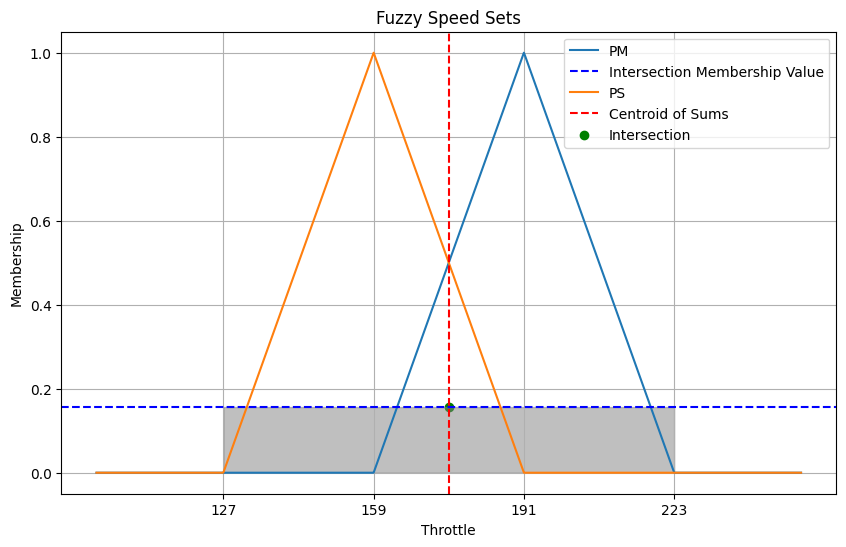

Defuzzified value (centroid of sums): 175.0000000000001


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the triangle coordinates
PM = [159, 191, 223]
PS = [127, 159, 191]

# Define the membership values
PM_membership = 0.15625
PS_membership = 0.15625

# Define x range
x = np.linspace(100, 250, 1000)

# Calculate the membership degrees for each set
#np.minimum( x-a/b-a , c-x/c-b)
PM_y = np.maximum(0, np.minimum((x - PM[0]) / (PM[1] - PM[0]), (PM[2] - x) / (PM[2] - PM[1])))
PS_y = np.maximum(0, np.minimum((x - PS[0]) / (PS[1] - PS[0]), (PS[2] - x) / (PS[2] - PS[1])))

# Calculate the centroid of sums
centroid_of_sums = (sum(x * PM_y) + sum(x * PS_y)) / (sum(PM_y) + sum(PS_y))

# Plot the membership functions
plt.figure(figsize=(10, 6))
plt.plot(x, PM_y, label='PM')
plt.axhline(y=0.15625, color='b', linestyle='--', label='Intersection Membership Value')
plt.plot(x, PS_y, label='PS')
plt.xticks([127,159,191,223])
# Plot the centroid of sums
plt.axvline(x=centroid_of_sums, color='red', linestyle='--', label='Centroid of Sums')

# Highlight the intersection point
plt.scatter([centroid_of_sums], [0.15625], color='green', label='Intersection')

# Shade the region below the membership value and inside the PM and PS fuzzy sets
# Shade the region below the membership value (0.15625) in the y-axis and between 127 and 223 in the x-axis
plt.fill_between(x, 0, 0.15625, where=(x >= 127) & (x <= 223), color='gray', alpha=0.5)


# Customize plot
plt.xlabel('Throttle')
plt.ylabel('Membership')
plt.title('Fuzzy Speed Sets')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

print("Defuzzified value (centroid of sums):", centroid_of_sums)
